# Part B - Application

> Some hopefully useful feedback from me on the HWs: Some people mentioned this in class, but I would like to relay my similar sentiments so that there can be more ideas for assignments in future classes (since our assignments are also a little experimental). I definitely think it would have been a lot more useful to know if I was going to use the datasets I was building in HW1 in future assignments. If I had known such information, then I would have approached the problem much differently and probably would've spent more time carefully building a nice useable dataset on that portion of the homework (rather than polishing the other reading and writing portions of the last assignment). 

# Question 1 (job-seeking dataset)

You have collected the data for assisting students in job seeking (Assignment 01, Part B, Prompt 1) and saved it as a .csv file. Apply the Python pandas package to the data you have collected, demonstrate how we can use it to get a better understanding of the data.

> Note from Jasmine: I decided to use a different dataset than the one I created in HW1 for the sake of this HW problem. This was because the dataset I built in HW1 was very limited in information and thus difficult to accomplish certain parts of this assignment. For instance, did NOT have any numerical data because the "salary" column contained much more different salary information than I was expecting. So I selected a data set on the same topic (job openings) but with much more useful information to accomplish this part of the assignment.  

The single CSV dataset I used for this assignment: https://catalog.data.gov/dataset/nyc-jobs

> About the dataset that I used for this assignment: I cleaned the data in a separate notebook. It's not necessarily filtered with only STEM positions.  

## Read in the data

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# read the data
df = pd.read_csv('JasmineKobayashiA02Positions.csv')

In [3]:
# Quick peek at the df
print('total # of rows in df:',len(df))
df.head()

total # of rows in df: 5519


,Agency,# Of Positions,Business Title,Civil Service Title,Title Classification,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Job Description,Minimum Qual Requirements,Hours/Shift,Residency Requirement,Posting Date,Post Until
0,NYC HOUSING AUTHORITY,1,"Director, IT Program Management Office",COMPUTER SYSTEMS MANAGER,Competitive-1,"Technology, Data & Innovation",F,Manager,80931.0,208826.0,Annual,ESM-Program & Portfolio Mgt,The NYCHA IT Department seeks a motivated cand...,1. A master's degree in computer science from ...,NaN,NYCHA has no residency requirements.,12/07/2022,NaN
1,DEPT OF ENVIRONMENT PROTECTION,2,Change Order Manager,PRINCIPAL ADMINISTRATIVE ASSOC,Competitive-1,"Engineering, Architecture, & Planning Finance,...",F,Experienced (non-manager),58695.0,89699.0,Annual,96-05 Horace Harding Expway,The NYC Department of Environmental Protection...,1. A baccalaureate degree from an accredited c...,NaN,New York City residency is generally required ...,12/13/2022,NaN
2,DEPT OF ENVIRONMENT PROTECTION,1,ACCOUNTABLE MANAGER,ADM ENGINEER (NON MGRL),Competitive-1,"Engineering, Architecture, & Planning Public S...",F,Experienced (non-manager),53702.0,146121.0,Annual,96-05 Horace Harding Expway,The NYC Department of Environmental Protection...,1. A valid New York State License as a Profess...,NaN,New York City Residency is not required for th...,01/09/2023,NaN
3,DISTRICT ATTORNEY RICHMOND COU,1,Assistant District Attorney - Domestic Violenc...,ASSISTANT DISTRICT ATTORNEY (S,Exempt-4,Legal Affairs,F,Manager,77000.0,93000.0,Annual,"130 Stuyvesant Place, S.I.",RICHMOND COUNTY DISTRICT ATTORNEY The men and...,1. New York State Bar Admission. 2. Three ...,NaN,New York City residency is generally required ...,05/11/2022,NaN
4,HRA/DEPT OF SOCIAL SERVICES,1,SENIOR PROCUREMENT AND CONTRACT ANALYST,ASSOCIATE STAFF ANALYST,Competitive-1,"Administration & Human Resources Policy, Resea...",F,Experienced (non-manager),70611.0,86887.0,Annual,4 World Trade Center,The Department of Social Services (DSS) is com...,1. A masterâs degree from an accredited coll...,NaN,New York City residency is generally required ...,04/18/2022,NaN


## Basic info of the dataset

Objects, attributes, datatype of attributes, etc.

Reminder to self (copied from class slides and class recommended textbook): 

- Object - entity: abstract data structure with certain attributes/features/dimensions/variables

- Attributes - characteristic or feature of a data object (Categorical: nominal, binary, ordinal; Numerical: interval-scaled, ratio-scaled, discrete or continuous.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5519 entries, 0 to 5518
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Agency                         5519 non-null   object 
 1   # Of Positions                 5519 non-null   int64  
 2   Business Title                 5519 non-null   object 
 3   Civil Service Title            5519 non-null   object 
 4   Title Classification           5519 non-null   object 
 5   Job Category                   5517 non-null   object 
 6   Full-Time/Part-Time indicator  5293 non-null   object 
 7   Career Level                   5517 non-null   object 
 8   Salary Range From              5519 non-null   float64
 9   Salary Range To                5519 non-null   float64
 10  Salary Frequency               5519 non-null   object 
 11  Work Location                  5519 non-null   object 
 12  Job Description                5519 non-null   o

In [5]:
# objects = available job positions 
# attributes = company name, full vs. part-time (binary),Salary info, location, etc.

# categorical attributes
cat_att = ['Title Classification',                  # ordinal (rank)
            'Job Category',                         # nominal (categorical)
            'Full-Time/Part-Time indicator',        # binary
            'Career Level',                         # ordinal
            'Salary Frequency',                     # nominal
            'Residency Requirement',]               # nominal

# numerical attributes
num_att = ['# Of Positions','Salary Range From','Salary Range To']   # all ratio-scaled (I think)

## For a categorical attribute:

### Value Counts

In [6]:
for i in cat_att:
    print(i+':')
    display(df[i].value_counts())

Title Classification:


Competitive-1               3359
Non-Competitive-5           1735
Pending Classification-2     241
Exempt-4                     131
Labor-3                       53
Name: Title Classification, dtype: int64

Job Category:


Engineering, Architecture, & Planning                                                                                                                                                                                                             682
Technology, Data & Innovation                                                                                                                                                                                                                     474
Legal Affairs                                                                                                                                                                                                                                     444
Building Operations & Maintenance                                                                                                                                                                                                                 304
Finance, Account

Full-Time/Part-Time indicator:


F    5115
P     178
Name: Full-Time/Part-Time indicator, dtype: int64

Career Level:


Experienced (non-manager)    4138
Manager                       617
Entry-Level                   610
Executive                      88
Student                        64
Name: Career Level, dtype: int64

Salary Frequency:


Annual    5129
Hourly     328
Daily       62
Name: Salary Frequency, dtype: int64

Residency Requirement:


New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.     3316
New York City Residency is not required for this position                                                                                                                                                                                                                                                                                                                                                            1068
NYCHA has no residency requirements.                                                                                                                                                

## For a numerical attribute

### Data basics: Min, Max

In [7]:
# Basics: min & max
for i in num_att:
    print("\'"+i+"\' :")
    print('Min:',df[i].min())
    print('Max:',df[i].max())
    print()

'# Of Positions' :
Min: 1
Max: 250

'Salary Range From' :
Min: 0.0
Max: 250000.0

'Salary Range To' :
Min: 15.0
Max: 265000.0



### Data Central Tendency: Mean, Median, Mode

In [8]:
# Central tendency: mean, median, mode
import statistics
for i in num_att:
    print("\'"+i+"\' :")
    print('Mean:',statistics.mean(df[i]))
    print('Median:',df[i].median())
    print('Mode:',df[i].mode()[0])
    print()

'# Of Positions' :
Mean: 2.3897445189345894
Median: 1.0
Mode: 1

'Salary Range From' :
Mean: 62416.43542382678
Median: 60171.0
Mode: 54100.0

'Salary Range To' :
Mean: 86458.16485876065
Median: 83399.0
Mode: 83981.0



### Data Dispersion: Range, Midrange, Quartiles, IQR, Variance, Std, Outliers

In [9]:
for i in num_att:
    print("\'"+i+"\' :")
    Max = df[i].max()
    Min = df[i].min()
    print('Range:',Max-Min)
    print('Midrange:',(Max-Min)/2)
    quan = df[i].quantile([0.25,0.5,0.75])
    for j in [0.25,0.5,0.75]:
        print('Quantile {}: {}'.format(j,quan[j]))
    print('IQR:',quan[0.75] - quan[0.25])
    print('Variance:',df[i].var())
    print('Std:',df[i].std())
    print()

'# Of Positions' :
Range: 249
Midrange: 124.5
Quantile 0.25: 1.0
Quantile 0.5: 1.0
Quantile 0.75: 1.0
IQR: 0.0
Variance: 88.83447980061102
Std: 9.42520449648765

'Salary Range From' :
Range: 250000.0
Midrange: 125000.0
Quantile 0.25: 50000.0
Quantile 0.5: 60171.0
Quantile 0.75: 75504.0
IQR: 25504.0
Variance: 896276901.9839704
Std: 29937.884059899265

'Salary Range To' :
Range: 264985.0
Midrange: 132492.5
Quantile 0.25: 62215.0
Quantile 0.5: 83399.0
Quantile 0.75: 109990.0
IQR: 47775.0
Variance: 1919148551.416429
Std: 43808.0877397819



### Some plots (just because)

<AxesSubplot: ylabel='Density'>

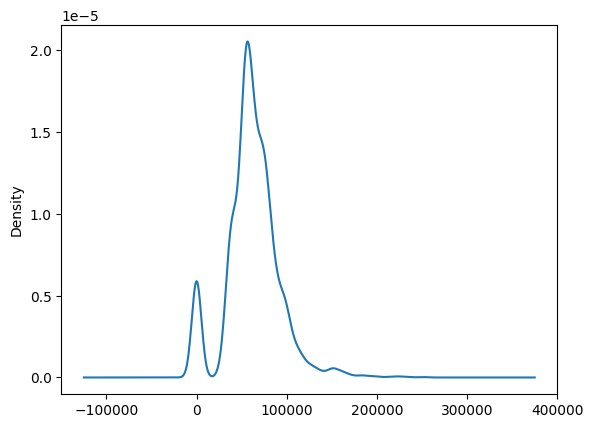

In [10]:
df['Salary Range From'].plot.density()

<AxesSubplot: >

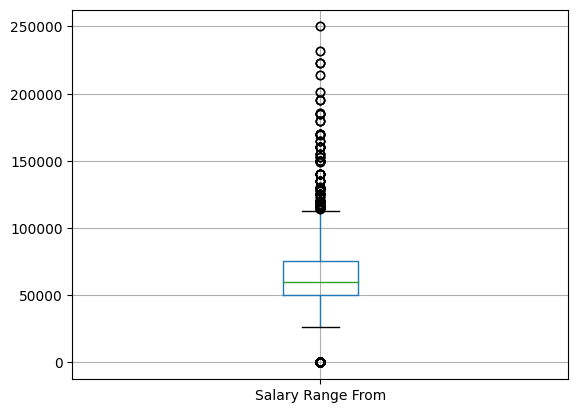

In [11]:
df.boxplot(column='Salary Range From')

<AxesSubplot: ylabel='Density'>

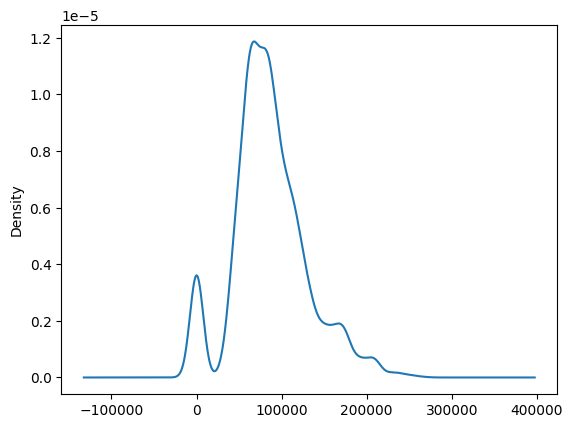

In [12]:
df['Salary Range To'].plot.density()

<AxesSubplot: >

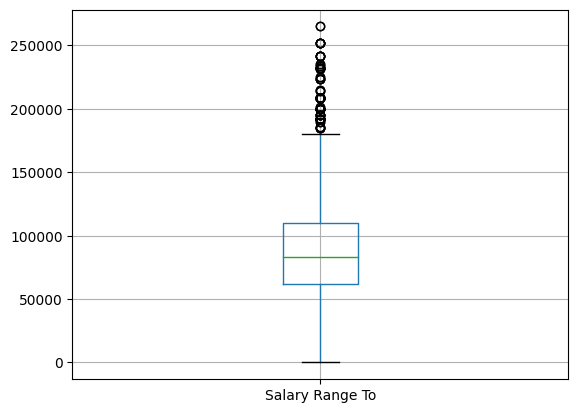

In [13]:
df.boxplot(column=['Salary Range To'])

## What knowledge may be mined from this data set?

### Categorical

- Over half of the positions are considered "competitive" (the other (less than) half are either non-competitive or not categorized)

- There are 190 job categories in the data set

- There are significantly more full-time positions than part-time

- The most sought-after "Career Level" is an "Experienced non-manager"

- The least sought-after is the "Students" category specifically

- But there are a considerable amount of Entry-level jobs

And even though I didn't filter this dataset to consist of only STEM positions, there's some useful information related to the most sought-after job categories

- Engineering is the most sought-after job category

- "Technology, Data & Innovation" and "Legal Affairs" are the next two sought-after categories.

In other words, the top two sought-after categories are in the STEM field. And that seems like pretty useful or at least reassuring information for someone who studied a program in the STEM field. 

(The "Residency Requirement" category just showed that I probably needed to do more data cleaning, because I could see that some entries were technically the same but the code considered them different because of very small typos.)

### Numerical

- Most places had only one position open, but some apparently had as many as 250 positions available

The "Salary Range From" column (in other words the minimum salary)

- Apparently, it was possible to start with no salary at all according to the occurrence of zero (but I'm not entirely sure if that's just a data cleaning negligence on my part). 

- The 3rd quartile and maximum value showed that it's possible to have a 6-figure minimum salary

The "Salary Range To"

- The most anyone could make from any of these position postings is $265000 (annually I'm sure). 

## How would the knowledge be useful in some applications?

The information from the categorical attributes can be useful in understanding the types of jobs that are out there and what are the most sought-after. 

And the information from the numerical attributes can give a sense of the range of salaries to potentially keep in mind (although it might be more useful to group and associate them with specific categories in the categorical attributes).

# Question 2 (News data)

You have collected data of news (Assignment 01, Part B, Prompt 2) and saved it as a .csv file. Perform text processing (refer tutorial). Label the data as positive/negative sentiments.

> Note from Jasmine: I probably won't be able to finish this part on time again. Although I really will try to get around to it once some of my other deadlines settle down. 

> But I think I would like to explain something since I understand that there's an effort being made by both the TA and the professor to specifically tailor the exercises to maximize benefits for all students. And I want to make this note to relieve some potential concerns about the skills I've been slacking practice on. The note is that I don't anticipate a lot of text processing in the career field I hope to enter. 

With my background in physics, I, personally, hope to apply my data science skills to science/physics research (maybe space physics specifically). And most of the data worked within that field tends to be numeric and categorical, and I can't imagine much potential in text processing or sentiment analysis in physics research data (because ideally nothing in physics is based on emotion). 

I'm not trying to say that I don't need this practice nor am I trying to "justify" my slacking. I just thought I would explain why these text-processing parts of the assignments so far have been a lower-priority exercise for me compared to the rest of the exercises. 

 I'm sure it would still be a potentially useful skill and practice, and I know it will probably be needed for the rest of the work in this class so again I plan to get around to it eventually. But I thought this might be a potentially useful thought process to explain. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b69dcf2a-968b-4990-883d-3ab139ec5f5e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>